In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.shape

(10000, 14)

In [7]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

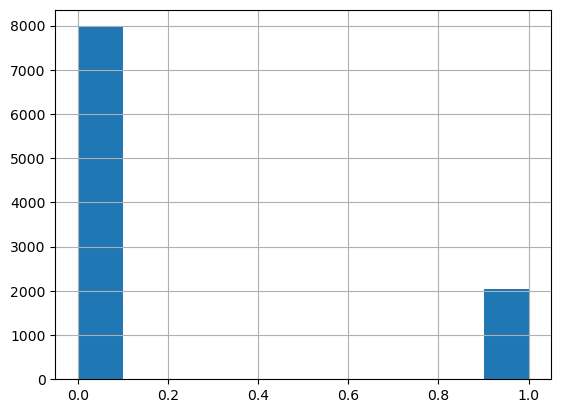

In [9]:
df['Exited'].hist()

### Basic EDA

In [10]:
df.describe() 
df.describe(include = ['O'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [11]:
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df_t = df.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

In [14]:
df_t.head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [15]:
df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [16]:
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

Among these, Tenure and NumOfProducts are ordinal variables. HasCrCard and IsActiveMember are actually binary categorical variables.

In [17]:
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

In [18]:
print(y)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.1, random_state = 42)

df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.12, random_state = 42)

In [21]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

### Univariate plots of numerical variables in training set

<AxesSubplot:ylabel='CreditScore'>

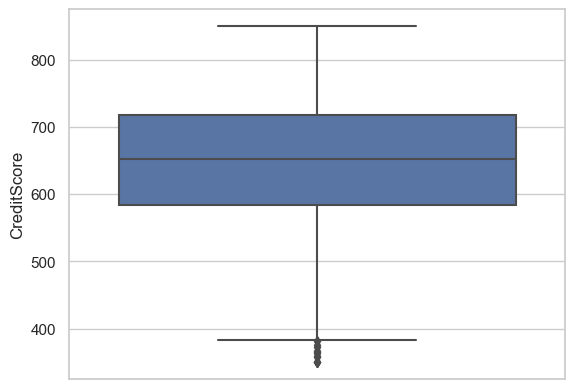

In [22]:
sns.set(style="whitegrid")
sns.boxplot(y = df_train['CreditScore'])

<AxesSubplot:ylabel='Age'>

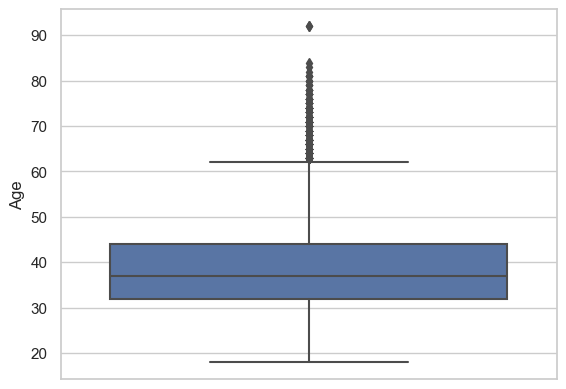

In [23]:
sns.boxplot(y = df_train['Age'])

<AxesSubplot:ylabel='Tenure'>

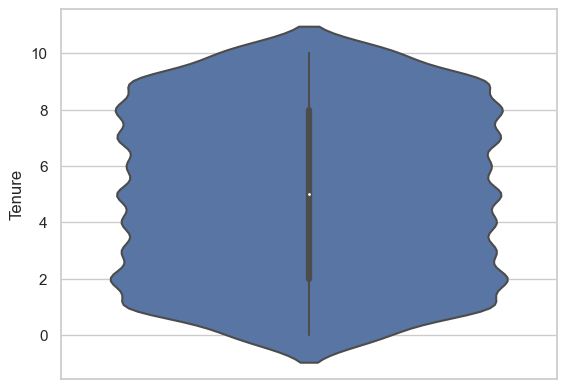

In [24]:
sns.violinplot(y = df_train.Tenure)

<AxesSubplot:ylabel='Balance'>

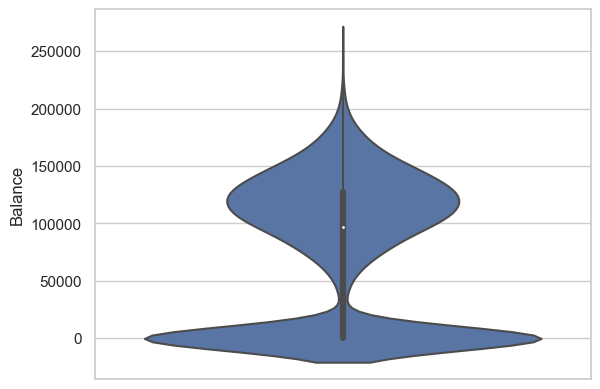

In [25]:
sns.violinplot(y = df_train['Balance'])

<AxesSubplot:xlabel='NumOfProducts'>

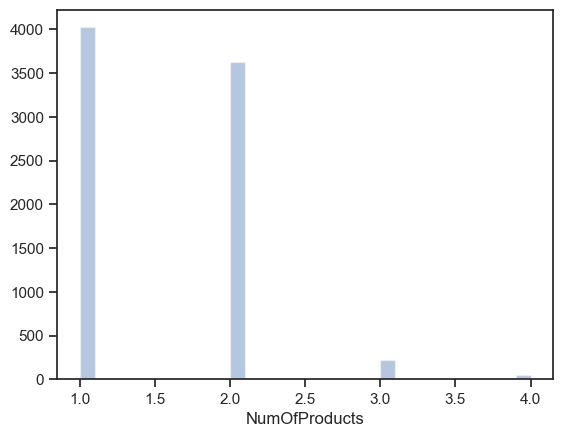

In [26]:
sns.set(style = 'ticks')
sns.distplot(df_train.NumOfProducts, hist=True, kde=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

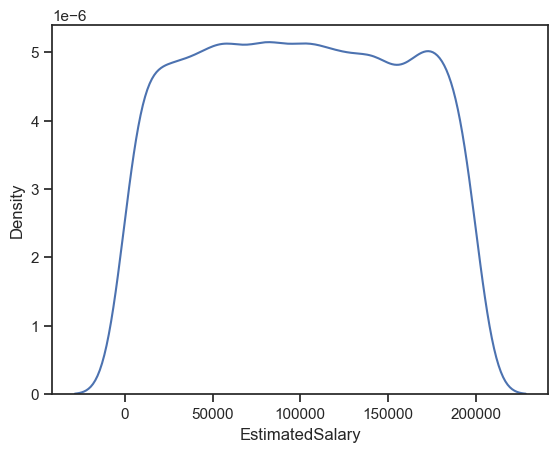

In [27]:
sns.kdeplot(df_train.EstimatedSalary)

### Missing values and outlier treatment

In [28]:
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df_missing = df_train.copy()

In [30]:
na_idx = df_missing.sample(frac = 0.1).index
df_missing.loc[na_idx, 'Age'] = np.NaN

na_idx = df_missing.sample(frac = 0.3).index
df_missing.loc[na_idx, 'Geography'] = np.NaN

na_idx = df_missing.sample(frac = 0.05).index
df_missing.loc[na_idx, 'HasCrCard'] = np.NaN

In [31]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.00
CreditScore        0.00
Geography          0.30
Gender             0.00
Age                0.10
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.05
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [32]:
age_mean = df_missing.Age.mean()

In [33]:
age_mean

38.89057239057239

In [34]:
df_missing['Age'] = df_missing.Age.apply(lambda x: int(np.random.normal(age_mean,3)) if np.isnan(x) else x)

<AxesSubplot:xlabel='Age', ylabel='Density'>

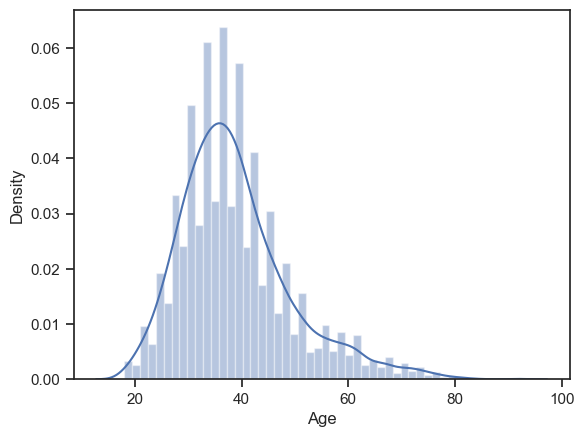

In [35]:
sns.distplot(df_train.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

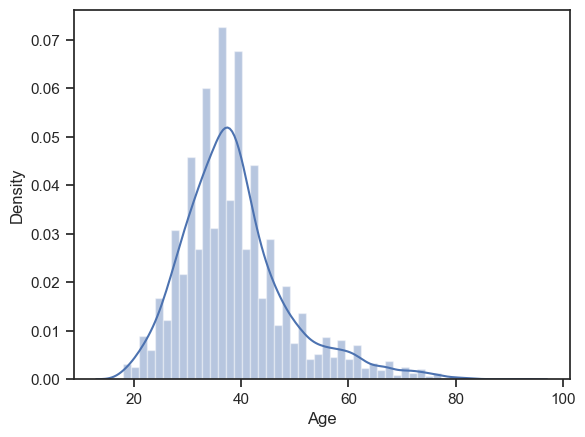

In [36]:
sns.distplot(df_missing.Age)

In [37]:
geog_fill_value = 'UNK'
df_missing.Geography.fillna(geog_fill_value, inplace=True)

df_missing.HasCrCard.fillna(0, inplace=True)

In [38]:
df_missing.Geography.value_counts(normalize=True)

France     0.353283
UNK        0.300000
Spain      0.176136
Germany    0.170581
Name: Geography, dtype: float64

In [39]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [43]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [44]:
le.transform([['Male']])

array([1])

In [45]:
pd.Series(['ABC']).map(le_name_mapping)

0   NaN
dtype: float64

In [46]:
df_val['Gender'] = df_val.Gender.map(le_name_mapping)
df_test['Gender'] = df_test.Gender.map(le_name_mapping)

df_val['Gender'].fillna(-1, inplace=True)
df_test['Gender'].fillna(-1, inplace=True)

In [47]:
df_train.Gender.unique(), df_val.Gender.unique(), df_test.Gender.unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

In [48]:
df_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4562,Yermakova,678,Germany,1,36,1,117864.85,2,1,0,27619.06,0
6498,Warlow-Davies,613,France,0,27,5,125167.74,1,1,0,199104.52,0
6072,Fu,628,France,1,45,9,0.00,2,1,1,96862.56,0
5813,Shih,513,France,1,30,5,0.00,2,1,0,162523.66,0
7407,Mahmood,639,France,1,22,4,0.00,2,1,0,28188.96,0


#### One-Hot encoding for categorical variables with multiple levels

In [49]:
t = pd.get_dummies(df_train, prefix_sep = "_", columns = ['Geography'])
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1,0,0


In [50]:
t.drop(['Geography_France'], axis=1, inplace=True)
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,0,0


In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [53]:
enc_train = le_ohe.fit_transform(df_train.Geography).reshape(df_train.shape[0],1)
enc_train.shape
np.unique(enc_train)

(7920, 1)

array([0, 1, 2])

In [54]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [55]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [56]:
enc_val = df_val.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = df_test.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)

enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [57]:
np.unique(enc_val)
np.unique(enc_test)

array([0, 1, 2])

array([0, 1, 2])

In [58]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [59]:
ohe.transform(np.array([[9999]]))

array([[0., 0., 0.]])

#### Adding the one-hot encoded columns to the dataframe

In [60]:
cols = ['country_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [61]:
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [62]:
print("Training set")
df_train.head()
print("\n\nValidation set")
df_val.head()
print("\n\nTest set")
df_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,Germany,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,France,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,France,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,France,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,France,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Sun,757,France,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0
1,Russo,552,France,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0
2,Munro,619,France,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0
3,Perkins,633,France,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
4,Aliyeva,698,Spain,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [63]:
df_train.drop(['Geography'], axis = 1, inplace=True)
df_val.drop(['Geography'], axis = 1, inplace=True)
df_test.drop(['Geography'], axis = 1, inplace=True)

#### Target encoding

In [64]:
df_train.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0


In [65]:
means = df_train.groupby(['Surname']).Exited.mean()
means.head()

Surname
Abazu       0.00
Abbie       0.00
Abbott      0.25
Abdullah    1.00
Abdulov     0.00
Name: Exited, dtype: float64

In [66]:
global_mean = y_train.mean()
global_mean

0.20303030303030303

In [67]:
df_train['Surname_mean_churn'] = df_train.Surname.map(means)
df_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

In [68]:
freqs = df_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     1
dtype: int64

In [69]:
df_train['Surname_freq'] = df_train.Surname.map(freqs)
df_train['Surname_freq'].fillna(0, inplace=True)

In [70]:
df_train['Surname_enc'] = ((df_train.Surname_freq * df_train.Surname_mean_churn) - df_train.Exited)/(df_train.Surname_freq - 1)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,NaN
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


In [71]:
df_train['Surname_enc'].fillna((((df_train.shape[0] * global_mean) - df_train.Exited) / (df_train.shape[0] - 1)), inplace=True)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,0.203056
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


On validation and test set, we'll apply the normal Target encoding mapping as obtained from the training set

In [72]:
df_val['Surname_enc'] = df_val.Surname.map(means)
df_val['Surname_enc'].fillna(global_mean, inplace=True)
df_test['Surname_enc'] = df_test.Surname.map(means)
df_test['Surname_enc'].fillna(global_mean, inplace=True)

In [73]:
df_train[['Surname_mean_churn', 'Surname_enc', 'Exited']].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.54823,0.562677
Surname_enc,0.548230,1.00000,-0.026440
Exited,0.562677,-0.02644,1.000000


In [74]:
df_train.drop(['Surname_mean_churn'], axis=1, inplace=True)
df_train.drop(['Surname_freq'], axis=1, inplace=True)
df_train.drop(['Surname'], axis=1, inplace=True)
df_val.drop(['Surname'], axis=1, inplace=True)
df_test.drop(['Surname'], axis=1, inplace=True)

In [75]:
df_train.head()
df_val.head()
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,757,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0,0.111111
1,552,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0,0.200000
2,619,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0,0.500000
3,633,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0,0.000000
4,698,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0,1.000000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,596,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0,0.083333
1,623,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0,0.203030
2,601,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0,0.333333
3,506,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0,0.153846
4,560,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0,0.230769


In [76]:
corr = df_train.corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
CreditScore,1.000000,0.000354,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117,-0.009481,0.003393,0.007561,-0.000739
Gender,0.000354,1.000000,-0.024446,0.010749,0.009380,-0.026795,0.007550,0.028094,-0.011007,-0.102331,0.000823,-0.018412,0.017361,0.008002
Age,0.002099,-0.024446,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221,-0.038881,0.048764,-0.003648,-0.010844
Tenure,0.005994,0.010749,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660,0.000021,-0.003131,0.003090,-0.006753
Balance,-0.001507,0.009380,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377,-0.231770,0.405616,-0.136044,0.006925
NumOfProducts,0.014110,-0.026795,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200,0.002991,-0.015926,0.012388,-0.002020
HasCrCard,-0.011868,0.007550,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659,0.005881,0.008197,-0.014934,-0.000551
IsActiveMember,0.035057,0.028094,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477,0.002126,-0.020570,0.018003,0.004902
EstimatedSalary,0.000358,-0.011007,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881,-0.004512,0.010583,-0.005320,-0.009899
Exited,-0.028117,-0.102331,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000,-0.106006,0.173492,-0.050264,-0.026440


<AxesSubplot:>

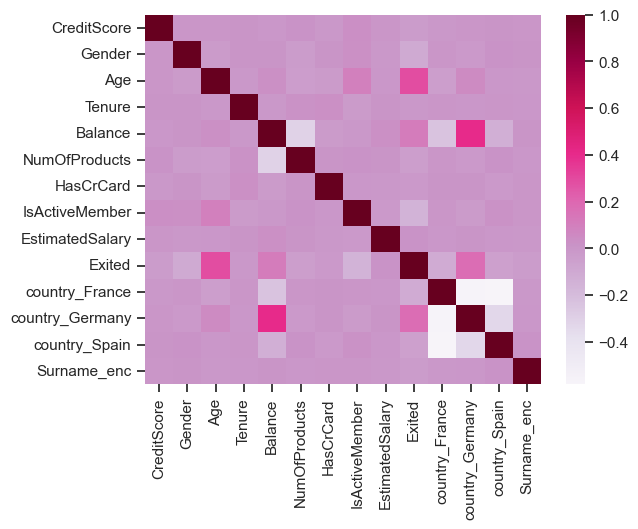

In [77]:
sns.heatmap(corr, cmap="PuRd")

#### Individual features versus their distibution across target variable values

<AxesSubplot:xlabel='Exited', ylabel='Age'>

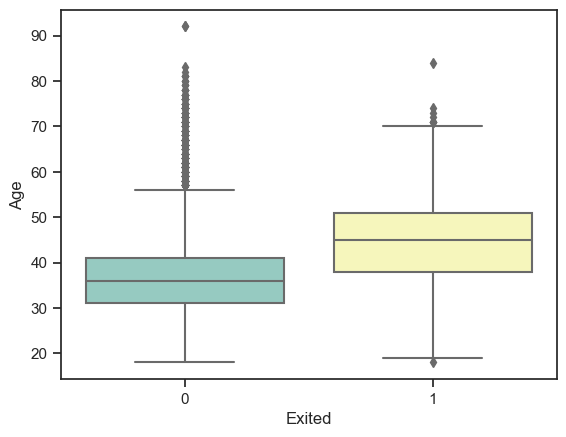

In [78]:
sns.boxplot(x = "Exited", y = "Age", data = df_train, palette="Set3")

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

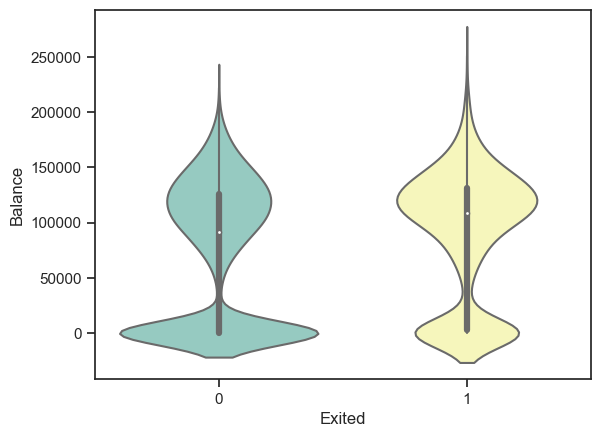

In [79]:
sns.violinplot(x = "Exited", y = "Balance", data = df_train, palette="Set3")

In [80]:
cat_vars_bv = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for col in cat_vars_bv:
    df_train.groupby([col]).Exited.mean()

Gender
0    0.248191
1    0.165511
Name: Exited, dtype: float64

IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64

country_Germany
0.0    0.163091
1.0    0.324974
Name: Exited, dtype: float64

country_France
0.0    0.245877
1.0    0.160593
Name: Exited, dtype: float64

In [81]:
col = 'NumOfProducts'
df_train.groupby([col]).Exited.mean()
df_train[col].value_counts()

NumOfProducts
1    0.273428
2    0.076881
3    0.825112
4    1.000000
Name: Exited, dtype: float64

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

#### feature engineering

In [82]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc'],
      dtype='object')

In [83]:
eps = 1e-6

df_train['bal_per_product'] = df_train.Balance/(df_train.NumOfProducts + eps)
df_train['bal_by_est_salary'] = df_train.Balance/(df_train.EstimatedSalary + eps)
df_train['tenure_age_ratio'] = df_train.Tenure/(df_train.Age + eps)
df_train['age_surname_mean_churn'] = np.sqrt(df_train.Age) * df_train.Surname_enc

In [84]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,58932.395534,4.267519,0.027778,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,125167.614832,0.628653,0.185185,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.200000,1.490712
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000,0.000000,0.000000,0.166667,1.643168
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.181818,2.345208


In [85]:
new_cols = ['bal_per_product','bal_by_est_salary','tenure_age_ratio','age_surname_mean_churn']

In [86]:
df_train[new_cols].isnull().sum()

bal_per_product           0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

<AxesSubplot:>

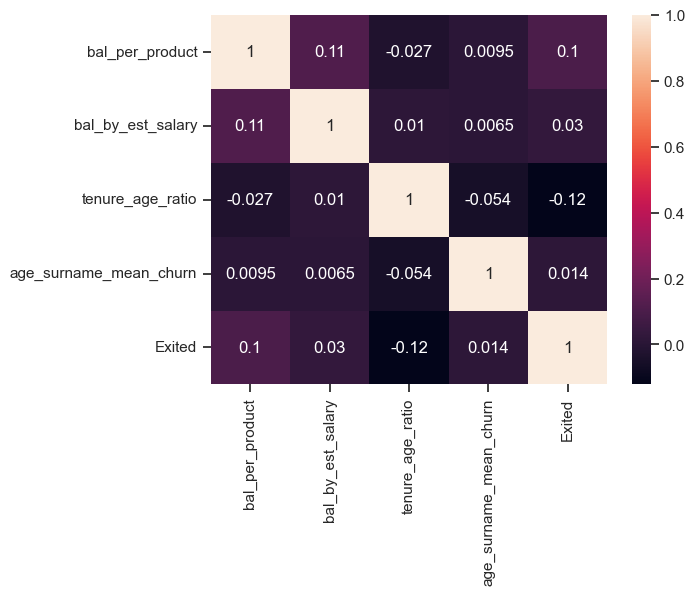

In [87]:
sns.heatmap(df_train[new_cols + ['Exited']].corr(), annot=True)

In [88]:
eps = 1e-6

df_val['bal_per_product'] = df_val.Balance/(df_val.NumOfProducts + eps)
df_val['bal_by_est_salary'] = df_val.Balance/(df_val.EstimatedSalary + eps)
df_val['tenure_age_ratio'] = df_val.Tenure/(df_val.Age + eps)
df_val['age_surname_mean_churn'] = np.sqrt(df_val.Age) * df_val.Surname_enc

In [89]:
eps = 1e-6

df_test['bal_per_product'] = df_test.Balance/(df_test.NumOfProducts + eps)
df_test['bal_by_est_salary'] = df_test.Balance/(df_test.EstimatedSalary + eps)
df_test['tenure_age_ratio'] = df_test.Tenure/(df_test.Age + eps)
df_test['age_surname_mean_churn'] = np.sqrt(df_test.Age) * df_test.Surname_enc

# Feature scaling and normalization

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

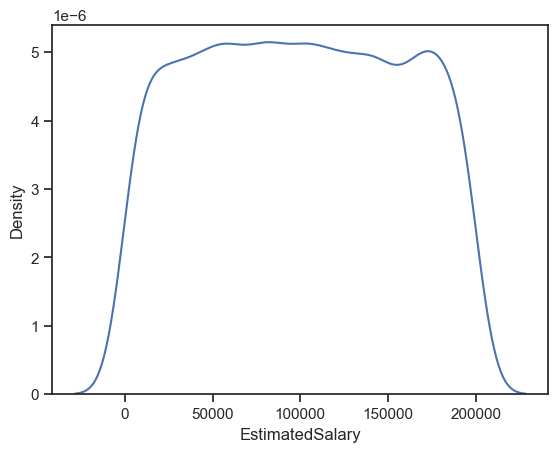

In [90]:
sns.distplot(df_train.EstimatedSalary, hist=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

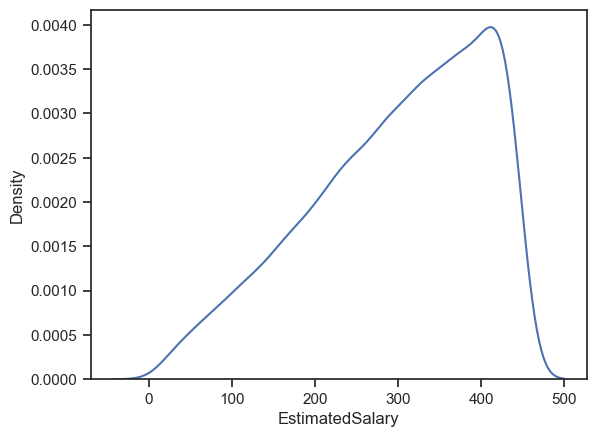

In [91]:
sns.distplot(np.sqrt(df_train.EstimatedSalary), hist=False)

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [93]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [94]:
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc', 'bal_per_product'
             , 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

In [95]:
cols_to_scale = cont_vars

In [96]:
sc_X_train = sc.fit_transform(df_train[cols_to_scale])

In [97]:
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_train.shape
sc_X_train.head()

(7920, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [98]:
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}
sc_map

{'mean': array([6.50542424e+02, 3.88912879e+01, 5.01376263e+00, 7.60258447e+04,
        1.53156566e+00, 9.96616540e+04, 2.04321788e-01, 6.24727199e+04,
        2.64665647e+00, 1.38117689e-01, 1.26136416e+00]),
 'std': array([9.64231806e+01, 1.05374237e+01, 2.88940724e+00, 6.23738902e+04,
        5.82587032e-01, 5.74167173e+04, 1.89325378e-01, 5.67456646e+04,
        1.69816787e+01, 8.95590667e-02, 1.18715858e+00])}

In [99]:
sc_X_val = sc.transform(df_val[cols_to_scale])
sc_X_test = sc.transform(df_test[cols_to_scale])

In [100]:
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)

# Feature selection - RFE

In [101]:
cont_vars
cat_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [102]:
y = df_train['Exited'].values
X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1)
X.columns = cat_vars + cont_vars

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [104]:
est = LogisticRegression()

In [105]:
rfe = RFE(est, n_features_to_select=5)
rfe = rfe.fit(X.values, y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False  True False False False False
 False False False  True False]
[ 1  8  1  3  1  4  7  1  2  5 11 10  6 12  9  1 13]


In [106]:
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender', 'IsActiveMember', 'country_Germany', 'Age', 'tenure_age_ratio']

In [107]:
mask = rfe.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['Gender', 'IsActiveMember', 'country_Germany', 'Age', 'tenure_age_ratio']

# Neural Networks

In [108]:
#pip install --upgrade numpy

In [109]:
#!pip install tensorflow

In [110]:
#pip install tensorflow==2.4.1 keras==2.4.3 numpy==1.19.3

In [111]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [112]:
import keras.models
import numpy

In [113]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense

In [114]:
import os
from keras.models import Sequential

In [115]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-05-06 20:05:27.698022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [116]:
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]

In [117]:
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_test.shape

((7920, 5), (1000, 5))

In [118]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
248/248 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8259 - val_loss: 0.4080 - val_accuracy: 0.8270
Epoch 2/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8355 - val_loss: 0.4015 - val_accuracy: 0.8410
Epoch 3/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8384 - val_loss: 0.4077 - val_accuracy: 0.8340
Epoch 4/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8376 - val_loss: 0.4031 - val_accuracy: 0.8340
Epoch 5/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8367 - val_loss: 0.4026 - val_accuracy: 0.8380
Epoch 6/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8370 - val_loss: 0.4110 - val_accuracy: 0.8290
Epoch 7/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8386 - val_loss: 0.4043 - val_accuracy: 0.8370
Epoch 

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

[]

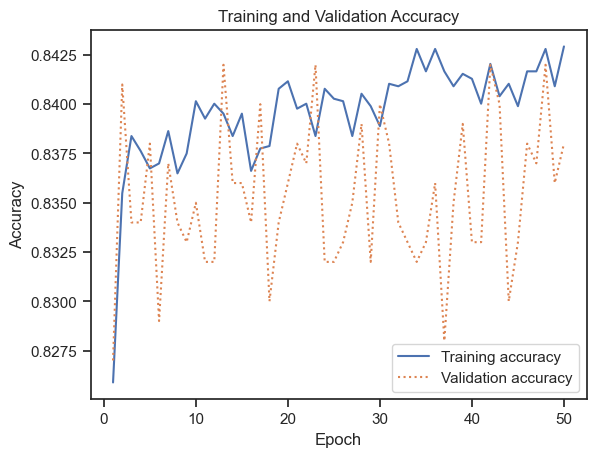

In [119]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# LSTM

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, TimeDistributed, Embedding

In [121]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(7920, 5)

(1000, 5)

(7920,)

(1000,)

In [122]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lolol = model.fit(X_train_reshaped, y_train,  validation_data=(X_test_reshaped, y_test), epochs=50, batch_size=32)

Epoch 1/50
248/248 [==============================] - 4s 8ms/step - loss: 0.4988 - accuracy: 0.7944 - val_loss: 0.4473 - val_accuracy: 0.8080
Epoch 2/50
248/248 [==============================] - 2s 6ms/step - loss: 0.4566 - accuracy: 0.7957 - val_loss: 0.4457 - val_accuracy: 0.8150
Epoch 3/50
248/248 [==============================] - 1s 6ms/step - loss: 0.4456 - accuracy: 0.7994 - val_loss: 0.4310 - val_accuracy: 0.8170
Epoch 4/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4364 - accuracy: 0.8013 - val_loss: 0.4426 - val_accuracy: 0.8170
Epoch 5/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4274 - accuracy: 0.8133 - val_loss: 0.4165 - val_accuracy: 0.8130
Epoch 6/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4192 - accuracy: 0.8201 - val_loss: 0.4056 - val_accuracy: 0.8290
Epoch 7/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4096 - accuracy: 0.8273 - val_loss: 0.4099 - val_accuracy: 0.8320
Epoch 

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

[]

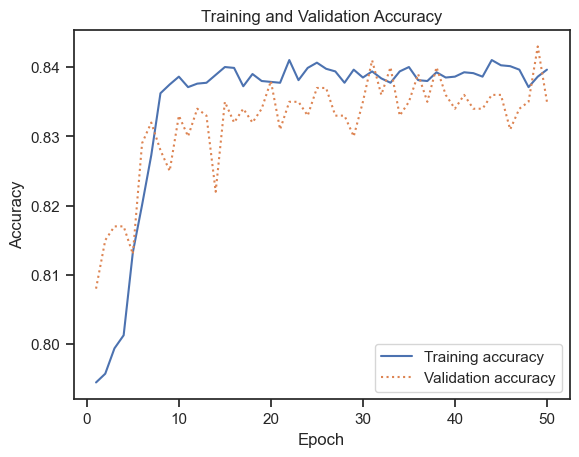

In [123]:
acc = lolol.history['accuracy']
val = lolol.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [124]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lolol = model.fit(X_train_reshaped, y_train,  validation_data=(X_test_reshaped, y_test), epochs=100, batch_size=32)

Epoch 1/100
248/248 [==============================] - 4s 7ms/step - loss: 0.5044 - accuracy: 0.7944 - val_loss: 0.4513 - val_accuracy: 0.8090
Epoch 2/100
248/248 [==============================] - 1s 5ms/step - loss: 0.4563 - accuracy: 0.7965 - val_loss: 0.4366 - val_accuracy: 0.8130
Epoch 3/100
248/248 [==============================] - 1s 5ms/step - loss: 0.4459 - accuracy: 0.7979 - val_loss: 0.4288 - val_accuracy: 0.8170
Epoch 4/100
248/248 [==============================] - 1s 5ms/step - loss: 0.4359 - accuracy: 0.8010 - val_loss: 0.4211 - val_accuracy: 0.8190
Epoch 5/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4287 - accuracy: 0.8072 - val_loss: 0.4248 - val_accuracy: 0.8160
Epoch 6/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4236 - accuracy: 0.8168 - val_loss: 0.4157 - val_accuracy: 0.8350
Epoch 7/100
248/248 [==============================] - 1s 5ms/step - loss: 0.4142 - accuracy: 0.8278 - val_loss: 0.4081 - val_accuracy: 0.8270

Epoch 58/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3898 - accuracy: 0.8427 - val_loss: 0.4091 - val_accuracy: 0.8320
Epoch 59/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.8389 - val_loss: 0.4104 - val_accuracy: 0.8410
Epoch 60/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3897 - accuracy: 0.8405 - val_loss: 0.4092 - val_accuracy: 0.8410
Epoch 61/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3899 - accuracy: 0.8410 - val_loss: 0.4062 - val_accuracy: 0.8400
Epoch 62/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3894 - accuracy: 0.8409 - val_loss: 0.4093 - val_accuracy: 0.8360
Epoch 63/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3892 - accuracy: 0.8388 - val_loss: 0.4055 - val_accuracy: 0.8400
Epoch 64/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3891 - accuracy: 0.8396 - val_loss: 0.4067 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

[]

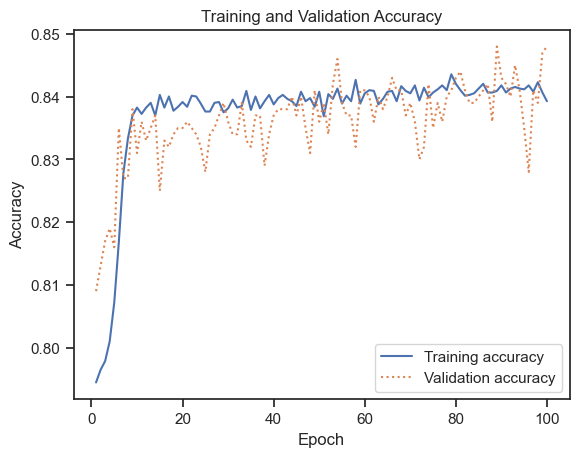

In [125]:
acc = lolol.history['accuracy']
val = lolol.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [126]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='relu')
])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lolol = model.fit(X_train_reshaped, y_train,  validation_data=(X_test_reshaped, y_test), epochs=100, batch_size=100)

Epoch 1/100
80/80 [==============================] - 3s 14ms/step - loss: 0.5176 - accuracy: 0.7970 - val_loss: 0.4836 - val_accuracy: 0.8090
Epoch 2/100
80/80 [==============================] - 1s 8ms/step - loss: 0.4859 - accuracy: 0.7970 - val_loss: 0.4558 - val_accuracy: 0.8070
Epoch 3/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4688 - accuracy: 0.7941 - val_loss: 0.4525 - val_accuracy: 0.8000
Epoch 4/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4640 - accuracy: 0.7939 - val_loss: 0.4480 - val_accuracy: 0.8040
Epoch 5/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4616 - accuracy: 0.7917 - val_loss: 0.4545 - val_accuracy: 0.8070
Epoch 6/100
80/80 [==============================] - 1s 7ms/step - loss: 0.5029 - accuracy: 0.7881 - val_loss: 0.4834 - val_accuracy: 0.8090
Epoch 7/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4904 - accuracy: 0.7970 - val_loss: 0.4681 - val_accuracy: 0.8090
Epoch 8/100


Epoch 59/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4044 - accuracy: 0.8343 - val_loss: 0.4317 - val_accuracy: 0.8360
Epoch 60/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4011 - accuracy: 0.8385 - val_loss: 0.4318 - val_accuracy: 0.8360
Epoch 61/100
80/80 [==============================] - 1s 8ms/step - loss: 0.3990 - accuracy: 0.8394 - val_loss: 0.4518 - val_accuracy: 0.8360
Epoch 62/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4005 - accuracy: 0.8374 - val_loss: 0.4377 - val_accuracy: 0.8380
Epoch 63/100
80/80 [==============================] - 1s 7ms/step - loss: 0.4030 - accuracy: 0.8381 - val_loss: 0.4530 - val_accuracy: 0.8330
Epoch 64/100
80/80 [==============================] - 1s 7ms/step - loss: 0.3989 - accuracy: 0.8384 - val_loss: 0.4414 - val_accuracy: 0.8330
Epoch 65/100
80/80 [==============================] - 1s 8ms/step - loss: 0.4013 - accuracy: 0.8380 - val_loss: 0.4315 - val_accuracy: 0.8320
Epoch 

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

[]

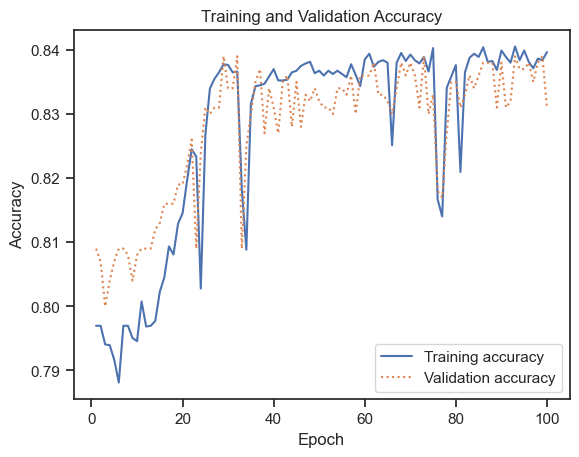

In [127]:
acc = lolol.history['accuracy']
val = lolol.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [133]:
#updated for joblib - don't delete

In [132]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lolol = model.fit(X_train_reshaped, y_train,  validation_data=(X_test_reshaped, y_test), epochs=100, batch_size=32)

Epoch 1/100
248/248 [==============================] - 4s 8ms/step - loss: 0.5013 - accuracy: 0.7958 - val_loss: 0.4484 - val_accuracy: 0.8090
Epoch 2/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4581 - accuracy: 0.7962 - val_loss: 0.4380 - val_accuracy: 0.8160
Epoch 3/100
248/248 [==============================] - 1s 5ms/step - loss: 0.4474 - accuracy: 0.7982 - val_loss: 0.4307 - val_accuracy: 0.8140
Epoch 4/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4390 - accuracy: 0.8016 - val_loss: 0.4229 - val_accuracy: 0.8190
Epoch 5/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4327 - accuracy: 0.7991 - val_loss: 0.4197 - val_accuracy: 0.8170
Epoch 6/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4289 - accuracy: 0.8081 - val_loss: 0.4175 - val_accuracy: 0.8080
Epoch 7/100
248/248 [==============================] - 1s 6ms/step - loss: 0.4196 - accuracy: 0.8222 - val_loss: 0.4061 - val_accuracy: 0.8300

Epoch 58/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3895 - accuracy: 0.8409 - val_loss: 0.4039 - val_accuracy: 0.8330
Epoch 59/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3893 - accuracy: 0.8408 - val_loss: 0.4096 - val_accuracy: 0.8390
Epoch 60/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3894 - accuracy: 0.8393 - val_loss: 0.4035 - val_accuracy: 0.8370
Epoch 61/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3891 - accuracy: 0.8409 - val_loss: 0.4109 - val_accuracy: 0.8450
Epoch 62/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3896 - accuracy: 0.8403 - val_loss: 0.4054 - val_accuracy: 0.8370
Epoch 63/100
248/248 [==============================] - 1s 6ms/step - loss: 0.3897 - accuracy: 0.8409 - val_loss: 0.4058 - val_accuracy: 0.8360
Epoch 64/100
248/248 [==============================] - 1s 5ms/step - loss: 0.3890 - accuracy: 0.8398 - val_loss: 0.4063 - val_accuracy:

### Train final, best model ; Save model and its parameters

import pickle
pickle.dump(model,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [134]:
import joblib

In [136]:
joblib.dump(model, 'final_churn_model_f1_0_45.sav')

INFO:tensorflow:Assets written to: ram://a4379e64-346a-40eb-b3b3-6e30b38124e0/assets


INFO:tensorflow:Assets written to: ram://a4379e64-346a-40eb-b3b3-6e30b38124e0/assets


['final_churn_model_f1_0_45.sav']